In [58]:
import pandas as pd

data = {
    "order_id": [1, 2, 3, 4, 5, 6],
    "customer_id": [101, 102, 101, 103, 104, 102],
    "country": ["USA", "India", "USA", "India", "USA", "India"],
    "amount": [200, 150, 300, 400, 100, 250],
    "order_date": [ "2024-01-01", "2024-01-02", "2024-01-03", "2024-01-04", "2024-01-05", "2024-01-06"]
}

df = pd.DataFrame(data)
df


,order_id,customer_id,country,amount,order_date
0,1,101,USA,200,2024-01-01
1,2,102,India,150,2024-01-02
2,3,101,USA,300,2024-01-03
3,4,103,India,400,2024-01-04
4,5,104,USA,100,2024-01-05
5,6,102,India,250,2024-01-06


In [59]:
df.head(10)

,order_id,customer_id,country,amount,order_date
0,1,101,USA,200,2024-01-01
1,2,102,India,150,2024-01-02
2,3,101,USA,300,2024-01-03
3,4,103,India,400,2024-01-04
4,5,104,USA,100,2024-01-05
5,6,102,India,250,2024-01-06


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     6 non-null      int64 
 1   customer_id  6 non-null      int64 
 2   country      6 non-null      object
 3   amount       6 non-null      int64 
 4   order_date   6 non-null      object
dtypes: int64(3), object(2)
memory usage: 368.0+ bytes


In [61]:
df.describe()

,order_id,customer_id,amount
count,6.000000,6.000000,6.000000
mean,3.500000,102.166667,233.333333
std,1.870829,1.169045,108.012345
min,1.000000,101.000000,100.000000
25%,2.250000,101.250000,162.500000
50%,3.500000,102.000000,225.000000
75%,4.750000,102.750000,287.500000
max,6.000000,104.000000,400.000000


In [62]:
customer_spend=(
    df.groupby("customer_id")["amount"]
    .sum()
    .reset_index()
)

customer_spend

,customer_id,amount
0,101,500
1,102,400
2,103,400
3,104,100


In [63]:
customer_spend["amount"].describe()

count      4.000000
mean     350.000000
std      173.205081
min      100.000000
25%      325.000000
50%      400.000000
75%      425.000000
max      500.000000
Name: amount, dtype: float64

In [64]:
q1 = customer_spend["amount"].quantile(0.25) 
q3 = customer_spend["amount"].quantile(0.75)

q1,q3

(np.float64(325.0), np.float64(425.0))

In [65]:
def segment_customer(spend):
    if spend <= q1:
        return "Low Value"
    elif spend <= q3:
        return "Medium Value"
    else:
        return "High Value"

In [66]:
customer_spend["segment"] = customer_spend["amount"].apply(segment_customer)

customer_spend

,customer_id,amount,segment
0,101,500,High Value
1,102,400,Medium Value
2,103,400,Medium Value
3,104,100,Low Value


In [67]:
customer_spend["segment"].value_counts()

segment
Medium Value    2
High Value      1
Low Value       1
Name: count, dtype: int64

In [68]:
customer_spend.groupby("segment")["amount"].sum().sort_values(ascending=False)

segment
Medium Value    800
High Value      500
Low Value       100
Name: amount, dtype: int64

In [69]:
total = customer_spend["amount"].sum()

# lets calculate percentage contribution of each segment
segment_share = customer_spend.groupby("segment")["amount"].sum() / total * 100

segment_share



segment
High Value      35.714286
Low Value        7.142857
Medium Value    57.142857
Name: amount, dtype: float64

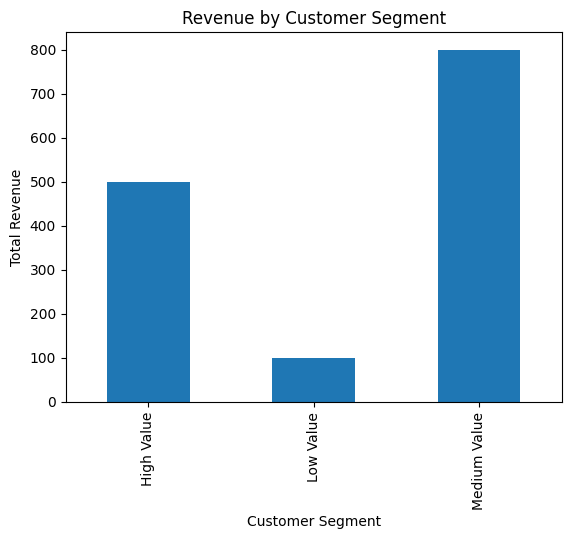

In [70]:
import matplotlib.pyplot as plt

#visualize revenue by segment
customer_spend.groupby("segment")["amount"].sum().plot(kind='bar')

plt.title("Revenue by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Total Revenue")
plt.show()

# Revenue is primarily driven by medium-value customers, contributing ~57% of total revenue.
# High-value customers contribute ~36%, while low-value customers contribute ~7%.
# The business is stable but could grow by converting low-value users into medium-value customers.


Day 1 – Customer Segmentation Analysis (Foundations of Data Analytics)

Overview:

On Day 1, I focused on building strong data analytics fundamentals by understanding the structure, quality, and statistical behavior of a transactional dataset before performing any advanced analysis.

Data Understanding & Validation:

- Inspected the dataset using head() to understand columns and sample records.

- Verified data quality and structure using info(), confirming there were no missing values and that data types were appropriate.

- Used describe() to analyze key statistical measures such as mean, median, standard deviation, and quartiles for numerical columns.

Statistical Insights

- Identified differences between mean and median, indicating the presence of higher-value transactions influencing the average.

- Analyzed standard deviation to understand variability in customer spending.

- Used quartiles to understand how spending is distributed across customers and to identify natural breakpoints for segmentation.

Customer Segmentation

- Aggregated transactional data to the customer level using group-by operations.

- Segmented customers into Low Value, Medium Value, and High Value categories based on spending quartiles.

- Implemented and validated segmentation logic to ensure accurate classification.

Business Insights

- Found that Medium Value customers contribute the largest share of total revenue, indicating a stable and diversified revenue base.

- High Value customers contribute significantly but do not dominate revenue, reducing dependency risk.

- Low Value customers represent a potential growth opportunity through targeted engagement or conversion strategies.

- Visualized revenue contribution by segment to clearly communicate insights.

Key Takeaway

This analysis demonstrated the importance of validating data, understanding statistical distributions, and translating numerical results into actionable business insights. The approach reflects real-world data analytics workflows and establishes a strong foundation for advanced SQL, machine learning, and AI applications.